In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

In [2]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

In [4]:
folder = "D:/Openclassrooms_DataScientist/Projet_3/donnees/"

In [5]:
df = pd.read_csv(folder+'data_2.csv', index_col=0)
df.head()

,Quartier,AgeBatiment,NombreUtilisations,PremierTypePropriete,NombreBatiments,NombreEtages,SurfacePlancherTotal,SurfaceTotaleParking,SurfaceTotaleHorsParking,ListeUtilisationsBatiment,UtilisationPrincipale,SurfaceUtilisationPrincipale,UtilisationSecondaire,SurfaceUtilisationSecondaire,UtilisationTertiaire,SurfaceUtilisationTertiaire,Conformité,ConsoSite/S(kBtu/sf),ConsoSiteNorm/S(kBtu/sf),ConsoSource/S(kBtu/sf),ConsoSourceNorm/S(kBtu/sf),ConsoSiteTot(kBtu),ConsoSiteTotNorm(kBtu),Vapeur(kBtu),Électricité(kBtu),GazNaturel(kBtu),EmissionGES,IntensiteGES/S,TrancheAge,Pertes/S(kBtu/sf),ProportionVapeur,ProportionElectricité,ProportionGazNaturel
0,DOWNTOWN,89,1,Hotel,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,Aucune,0.0,Aucune,0.0,Compliant,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83,"[87,116[",100.800003,0.277302,0.546060,0.176638
1,DOWNTOWN,20,3,Hotel,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,Compliant,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86,"[0,29[",81.300003,0.000000,0.386609,0.613391
2,DOWNTOWN,47,1,Hotel,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,Aucune,0.0,Aucune,0.0,Compliant,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,"[29,58[",145.899994,0.297113,0.682307,0.020579
3,DOWNTOWN,90,1,Hotel,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,Aucune,0.0,Aucune,0.0,Compliant,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67,"[87,116[",105.399994,0.325913,0.407519,0.266567
4,DOWNTOWN,36,3,Hotel,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,Compliant,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88,"[29,58[",96.599991,0.000000,0.378802,0.621198


Etapes : 

- choix des modèles à utiliser
- choix des colonnes
- encodage
- choix des variables : feature selection
- standardisation (2e iter)
- entrainement
- optimisation avec GridSearchCV
- evaluation : score, learning curve

In [6]:
df.columns

Index(['Quartier', 'AgeBatiment', 'NombreUtilisations', 'PremierTypePropriete',
       'NombreBatiments', 'NombreEtages', 'SurfacePlancherTotal',
       'SurfaceTotaleParking', 'SurfaceTotaleHorsParking',
       'ListeUtilisationsBatiment', 'UtilisationPrincipale',
       'SurfaceUtilisationPrincipale', 'UtilisationSecondaire',
       'SurfaceUtilisationSecondaire', 'UtilisationTertiaire',
       'SurfaceUtilisationTertiaire', 'Conformité', 'ConsoSite/S(kBtu/sf)',
       'ConsoSiteNorm/S(kBtu/sf)', 'ConsoSource/S(kBtu/sf)',
       'ConsoSourceNorm/S(kBtu/sf)', 'ConsoSiteTot(kBtu)',
       'ConsoSiteTotNorm(kBtu)', 'Vapeur(kBtu)', 'Électricité(kBtu)',
       'GazNaturel(kBtu)', 'EmissionGES', 'IntensiteGES/S', 'TrancheAge',
       'Pertes/S(kBtu/sf)', 'ProportionVapeur', 'ProportionElectricité',
       'ProportionGazNaturel'],
      dtype='object')

## Choix de mes variables

Mon modèle est un modèle de régression qui consiste à déterminer les consommations au m² des bâtiments en fonction de leur caractéristiques.

In [7]:
data = df[['Quartier', 'AgeBatiment', 'NombreUtilisations', 'PremierTypePropriete',
 'NombreBatiments', 'NombreEtages', 'SurfacePlancherTotal',
 'Conformité', 'ConsoSite/S(kBtu/sf)']]

data.head()

,Quartier,AgeBatiment,NombreUtilisations,PremierTypePropriete,NombreBatiments,NombreEtages,SurfacePlancherTotal,Conformité,ConsoSite/S(kBtu/sf)
0,DOWNTOWN,89,1,Hotel,1.0,12,88434,Compliant,81.699997
1,DOWNTOWN,20,3,Hotel,1.0,11,103566,Compliant,94.800003
2,DOWNTOWN,47,1,Hotel,1.0,41,956110,Compliant,96.000000
3,DOWNTOWN,90,1,Hotel,1.0,10,61320,Compliant,110.800003
4,DOWNTOWN,36,3,Hotel,1.0,18,175580,Compliant,114.800003


In [8]:
# variables et cible
y = data['ConsoSite/S(kBtu/sf)']
X = data.drop(columns='ConsoSite/S(kBtu/sf)')

In [9]:
print(y.shape)
print(X.shape)

(1524,)
(1524, 8)


### Encodage des variables qualitatives

In [10]:
# creation d'une liste avec toutes les catégories
categ = []
for col in X.select_dtypes(include='object').columns :
    for element in X[col].unique():
        categ.append(element)

In [11]:
# encodage des variables qualitatives
X_categ = OneHotEncoder(sparse_output=False).fit_transform(X.select_dtypes(include='object'))

# dataframe pour ces variables
df_X_categ = pd.DataFrame(X_categ, columns=categ, index=X.index)

# concatenation des variables qualitatives encodées et des variables quantitatives
X_encod = pd.concat((X.select_dtypes(exclude='object'), df_X_categ), axis=1)
X_encod.head()

,AgeBatiment,NombreUtilisations,NombreBatiments,NombreEtages,SurfacePlancherTotal,DOWNTOWN,NORTHEAST,EAST,LAKE UNION,GREATER DUWAMISH,BALLARD,NORTHWEST,MAGNOLIA / QUEEN ANNE,CENTRAL,SOUTHWEST,SOUTHEAST,NORTH,DELRIDGE,DELRIDGE NEIGHBORHOODS,Hotel,Other,Mixed Use Property,University,Small- and Mid-Sized Office,Self-Storage Facility,Warehouse,K-12 School,Large Office,Senior Care Community,Medical Office,Retail Store,Hospital,Residence Hall,Distribution Center,Worship Facility,Supermarket / Grocery Store,Laboratory,Refrigerated Warehouse,Low-Rise Multifamily,Restaurant,Compliant,Non-Compliant
0,89,1,1.0,12,88434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,3,1.0,11,103566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47,1,1.0,41,956110,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,90,1,1.0,10,61320,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,36,3,1.0,18,175580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature selection avec SelectkBest

In [12]:
# on fait varier k pour déterminer les k variables à gardées pour maximiser le R²

scores = []

for k in range(X_encod.shape[1],1,-1):
    selectk = SelectKBest(f_regression, k=k)
    X_k = selectk.fit_transform(X_encod, y)
    X_train, X_test, y_train, y_test = train_test_split(X_k, y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)

# score d'importance des variables sur la variable cible
selectk_scores = pd.Series(selectk.scores_, index=X_encod.columns).sort_values()
print(selectk_scores)

NORTHEAST                        0.000262
Refrigerated Warehouse           0.005275
SOUTHWEST                        0.006109
EAST                             0.020421
DELRIDGE                         0.023616
Medical Office                   0.040407
NORTH                            0.066426
LAKE UNION                       0.095557
GREATER DUWAMISH                 0.158185
CENTRAL                          0.184487
NombreEtages                     0.373620
Mixed Use Property               0.557093
DOWNTOWN                         1.079879
Retail Store                     1.120255
Warehouse                        1.333931
Residence Hall                   1.360124
Self-Storage Facility            1.360400
K-12 School                      1.590951
Compliant                        1.729912
Non-Compliant                    1.729912
SurfacePlancherTotal             2.224287
University                       3.576458
NombreBatiments                  3.991585
BALLARD                          4

Text(0, 0.5, 'Valeur de R²')

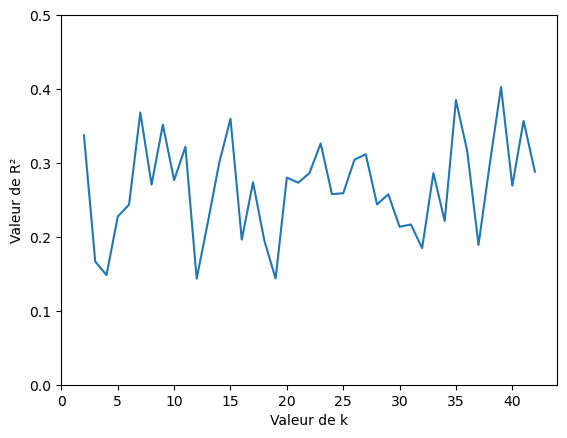

In [13]:
# courbé des R² en fonction des k variables retenues
plt.plot(range(X_encod.shape[1],1,-1), scores)
plt.ylim(0,0.5)
plt.xlabel('Valeur de k')
plt.ylabel('Valeur de R²')

In [14]:
# détermination des k variables à retenir pour maximiser le score
k = range(X_encod.shape[1],1,-1)[np.argmax(scores)]
k

39

### Création dataframe avec les k variables

In [15]:
selector = SelectKBest(f_regression, k=k)

# echantillon avec les k variables selectionnées
X_selector = selector.fit_transform(X_encod, y)

# df avec les k variables selectionnées et les noms de colonnes associées
X_selector = X_encod[X_encod.columns[selector.get_support()]]
X_selector.head()

,AgeBatiment,NombreUtilisations,NombreBatiments,NombreEtages,SurfacePlancherTotal,DOWNTOWN,EAST,LAKE UNION,GREATER DUWAMISH,BALLARD,NORTHWEST,MAGNOLIA / QUEEN ANNE,CENTRAL,SOUTHEAST,NORTH,DELRIDGE,DELRIDGE NEIGHBORHOODS,Hotel,Other,Mixed Use Property,University,Small- and Mid-Sized Office,Self-Storage Facility,Warehouse,K-12 School,Large Office,Senior Care Community,Medical Office,Retail Store,Hospital,Residence Hall,Distribution Center,Worship Facility,Supermarket / Grocery Store,Laboratory,Low-Rise Multifamily,Restaurant,Compliant,Non-Compliant
0,89,1,1.0,12,88434,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,3,1.0,11,103566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47,1,1.0,41,956110,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,90,1,1.0,10,61320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,36,3,1.0,18,175580,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variables gardées avec leur coefficient

In [16]:
coef = selectk_scores[X_selector.columns]
coef

AgeBatiment                     34.007904
NombreUtilisations              13.991655
NombreBatiments                  3.991585
NombreEtages                     0.373620
SurfacePlancherTotal             2.224287
DOWNTOWN                         1.079879
EAST                             0.020421
LAKE UNION                       0.095557
GREATER DUWAMISH                 0.158185
BALLARD                          4.197601
NORTHWEST                       39.307219
MAGNOLIA / QUEEN ANNE            7.734761
CENTRAL                          0.184487
SOUTHEAST                        4.997333
NORTH                            0.066426
DELRIDGE                         0.023616
DELRIDGE NEIGHBORHOODS           6.004921
Hotel                           15.212116
Other                           26.898413
Mixed Use Property               0.557093
University                       3.576458
Small- and Mid-Sized Office     87.578127
Self-Storage Facility            1.360400
Warehouse                        1

### Création de variables polynomiales pour les variables quantitatives

In [17]:
'''# variables numériques de data
data_var_num = data.select_dtypes(exclude='object').columns


# variables numériques de data présentes dans les variables sélectionnées
data_var_num_pres = data_var_num[data_var_num.isin(X_selector.columns)]

X_selector_categ = X_selector.drop(columns=data_var_num_pres)

X_selector_num = X_selector[data_var_num_pres]
X_selector_num.head()

# creation d'un df avec des variables polynomiales de degré 2
poly = PolynomialFeatures(2)

poly.fit_transform(X_selector_num)

poly.get_feature_names_out()

X_selector_num_poly = pd.DataFrame(poly.fit_transform(X_selector_num),
                                   columns=poly.get_feature_names_out(), 
                                  index=X_selector.index)
X_selector_num_poly

# concaténation du df variables numériques poly et df categ encodées
X_selector = pd.concat((X_selector_num_poly, X_selector_categ), axis=1)
X_selector'''

"# variables numériques de data\ndata_var_num = data.select_dtypes(exclude='object').columns\n\n\n# variables numériques de data présentes dans les variables sélectionnées\ndata_var_num_pres = data_var_num[data_var_num.isin(X_selector.columns)]\n\nX_selector_categ = X_selector.drop(columns=data_var_num_pres)\n\nX_selector_num = X_selector[data_var_num_pres]\nX_selector_num.head()\n\n# creation d'un df avec des variables polynomiales de degré 2\npoly = PolynomialFeatures(2)\n\npoly.fit_transform(X_selector_num)\n\npoly.get_feature_names_out()\n\nX_selector_num_poly = pd.DataFrame(poly.fit_transform(X_selector_num),\n                                   columns=poly.get_feature_names_out(), \n                                  index=X_selector.index)\nX_selector_num_poly\n\n# concaténation du df variables numériques poly et df categ encodées\nX_selector = pd.concat((X_selector_num_poly, X_selector_categ), axis=1)\nX_selector"

La création de variables polynomiales n'a pas été concluante, créer un modèle non prédictif.

### Création du modèle avec les k variables

In [18]:
# creation des jeux d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.32608859948478885

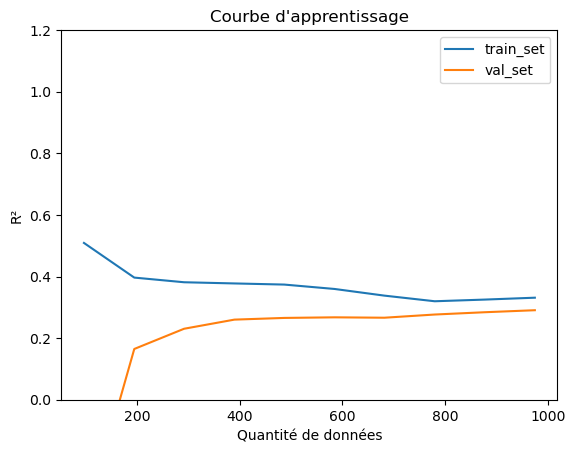

In [19]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

### Test du Ridge, Lasso et ElasticNet

In [20]:
# Ridge
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

ridge = Ridge()

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test)

0.3471404923341772

In [21]:
# Lasso
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

lasso = Lasso()

lasso.fit(X_train, y_train)

lasso.score(X_test, y_test)

0.2213073456750777

In [22]:
# ElasticNet
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

elastic_net = ElasticNet()

elastic_net.fit(X_train, y_train)

elastic_net.score(X_test, y_test)

0.03541672777168425

Le Ridge obtient le meilleur R², meilleur que la régression linéaire simple.

### Courbe d'apprentissage du Ridge

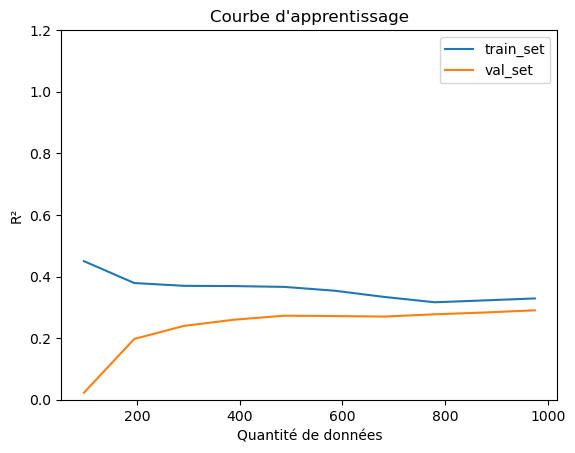

In [23]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(ridge, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

### Optimisation du Ridge

In [24]:
ridge = Ridge()

param_grid = {
    'alpha' : [0.01, 0.1, 1.0, 10.0], # controle la force de régularisation
    'tol' : [1e-4, 1e-3, 1e-2],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], # critère de convergence pour déterminer les coefs des variables
    'positive' : [True, False] # force les coefficients positifs, ou non
}

In [25]:
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'positive': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [28]:
best_params_ = grid.best_params_
best_params_

{'alpha': 0.1, 'positive': False, 'solver': 'auto', 'tol': 0.0001}

In [35]:
grid.best_score_

0.28523783059471824

In [30]:
ridge_opti = Ridge(**best_params_)

ridge_opti.fit(X_train, y_train)

ridge_opti.score(X_test, y_test)

0.3294488924812694

L'algorithme optimisé à un score moins bon que l'algorithme de base, on garde donc celui de base.

### Tentative d'utilisation d'autres algorithmes

In [177]:
# RandomForest
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

RandomForest = RandomForestRegressor()

RandomForest.fit(X_train, y_train)

RandomForest.score(X_test, y_test)

0.38810591565020724

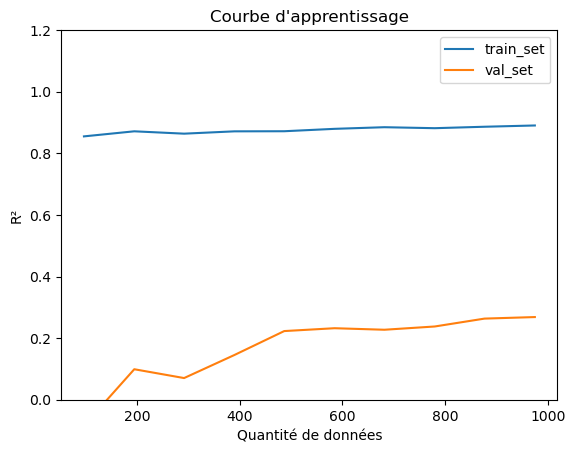

In [178]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(RandomForest, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

Le modèle est en surapprentissage, nous allons régler les hyperparamètres afin de remédier à cela.

In [164]:
# AdaBoost
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

AdaBoost = AdaBoostRegressor()

AdaBoost.fit(X_train, y_train)

AdaBoost.score(X_test, y_test)

-0.5639167110674035

RandomForestRegressor semble très intéressant.  
Je vais maintenant tenter de l'optimiser.

### Optimisation RandomForest

In [165]:
RandomForest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20],  # Profondeur maximale des arbres (None signifie aucune limite)
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis dans un nœud feuille
    'max_features': ['auto', 'sqrt'],  # Nombre de caractéristiques à considérer lors de la recherche de la meilleure division
    'bootstrap': [True, False]  # Si les échantillons sont tirés avec remplacement (bootstrapping) lors de la construction des arbres
}

In [166]:
grid = GridSearchCV(estimator=RandomForest, param_grid=param_grid, cv=5, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [172]:
best_estimator = grid.best_estimator_
best_estimator

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=10, n_estimators=50)

In [168]:
grid.best_score_

0.330966268642064

In [173]:
best_params = grid.best_params_
best_params

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [174]:
cv_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
303,0.087150,7.478950e-04,0.007196,3.996611e-04,False,20,sqrt,1,10,50,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.238084,0.378292,0.297381,0.306385,0.434689,0.330966,0.068348,1
137,0.530691,1.242007e-02,0.026388,8.016113e-04,True,20,sqrt,1,2,200,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.251425,0.354447,0.283962,0.323308,0.438214,0.330271,0.064258,2
197,0.390973,1.306759e-02,0.026385,1.852497e-03,False,None,sqrt,1,10,200,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.218133,0.381993,0.292887,0.304887,0.438726,0.327325,0.076172,3
305,0.343400,2.332309e-03,0.023988,6.366667e-04,False,20,sqrt,1,10,200,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.217048,0.382775,0.297385,0.294446,0.441457,0.326622,0.077765,4
30,0.118933,1.896376e-03,0.007793,3.984491e-04,True,None,sqrt,1,5,50,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.247227,0.386155,0.277278,0.308061,0.412130,0.326170,0.063147,5
136,0.264852,7.510560e-03,0.013988,6.335862e-04,True,20,sqrt,1,2,100,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.260635,0.354744,0.287534,0.313896,0.407048,0.324771,0.051548,6
304,0.174505,1.956590e-03,0.012990,6.312081e-04,False,20,sqrt,1,10,100,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.221234,0.378322,0.287497,0.297128,0.438447,0.324526,0.075714,7
31,0.236058,3.869196e-03,0.014195,7.429449e-04,True,None,sqrt,1,5,100,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.243269,0.345597,0.287397,0.299559,0.445413,0.324247,0.068792,8
29,0.620106,1.459396e-02,0.028185,9.818125e-04,True,None,sqrt,1,2,200,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.258073,0.339796,0.293588,0.324762,0.403878,0.324019,0.048789,9
196,0.185500,2.874278e-03,0.013189,4.003049e-04,False,None,sqrt,1,10,100,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.206241,0.374358,0.301912,0.306577,0.426817,0.323181,0.074515,10


### Modèle définitif avec les meilleurs paramètres de la grille

In [219]:
# RandomForest
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

RandomForest = RandomForestRegressor(bootstrap=False, max_depth=15, max_features='sqrt',
                      min_samples_split=20, n_estimators=40)

RandomForest.fit(X_train, y_train)

RandomForest.score(X_test, y_test)

0.41775850370253487

Le score est moins bon que le modèle de base, mais il a été testé sur plus de données avec la cross validation est donc suceptible de mieux généraliser.

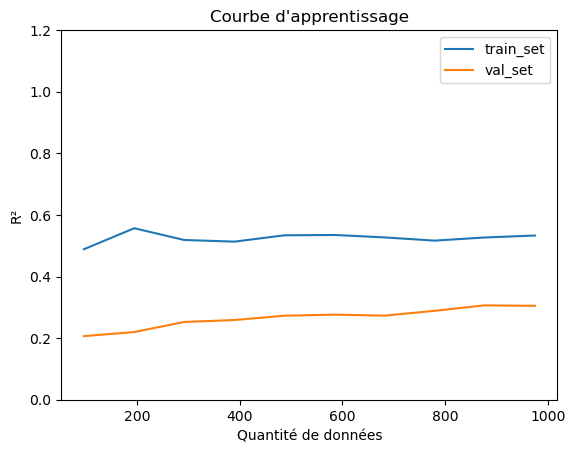

In [220]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(RandomForest, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

### KNN et SVM

In [222]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

-0.34498850984492213

In [223]:
# SVR
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

svr = LinearSVR()

svr.fit(X_train, y_train)

svr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-0.3950838293803298

Ces 2 modèles ne sont pas concluants, les meilleurs modèles sont le Ridge et la RandomForest, avec la RandomForest en première place.